In [90]:
import pymongo
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
myclient = pymongo.MongoClient("mongodb://localhost:27010/")
mydb = myclient["portfolio"]
mycol = mydb["p"]
myclient.server_info()

{'allocator': 'tcmalloc',
 'bits': 64,
 'buildEnvironment': {'cc': '/opt/mongodbtoolchain/v3/bin/gcc: gcc (GCC) 8.2.0',
  'ccflags': '-fno-omit-frame-pointer -fno-strict-aliasing -ggdb -pthread -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -Werror -O2 -Wno-unused-local-typedefs -Wno-unused-function -Wno-deprecated-declarations -Wno-unused-const-variable -Wno-unused-but-set-variable -Wno-missing-braces -fstack-protector-strong -fno-builtin-memcmp',
  'cxx': '/opt/mongodbtoolchain/v3/bin/g++: g++ (GCC) 8.2.0',
  'cxxflags': '-Woverloaded-virtual -Wno-maybe-uninitialized -fsized-deallocation -std=c++17',
  'distarch': 'x86_64',
  'distmod': 'ubuntu1804',
  'linkflags': '-pthread -Wl,-z,now -rdynamic -Wl,--fatal-warnings -fstack-protector-strong -fuse-ld=gold -Wl,--build-id -Wl,--hash-style=gnu -Wl,-z,noexecstack -Wl,--warn-execstack -Wl,-z,relro',
  'target_arch': 'x86_64',
  'target_os': 'linux'},
 'debug': False,
 'gitVersion': 'edf6d45851c0b9ee15548f0f847df141764a317e',
 'jav

In [92]:
def plot(portfolio):
    change = portfolio[0:][['total_value']].values[0] / portfolio[-1:][['total_value']].values[0]
    tit = "Result: " + str(change[0])[:4].replace(".","") + "%"
    portfolio[["total_value", "value", "cash", "date"]].plot(x='date', figsize=(12, 5), title=tit)
    plt.show()

In [93]:
def extract_value(x):
    stocks = [v for v in x.values()]
    value = sum([s["adjusted_close"] for s in stocks])
    return value

In [94]:
def plot_portfolio(p_name):
    myquery = { "name": p_name }
    mydoc = list(mycol.find(myquery))

    dt = [(t["cash"], t['holdings'], t["date"]) for t in mydoc]

    df = DataFrame(dt, columns=["cash", "holdings", "date"])
    df['date'] = pd.to_datetime(df.date)
    df = df.sort_values(by='date', ascending=False)
    df.cash.astype('float')
    df['value'] = df.holdings.apply(lambda x: extract_value(x))
    df["total_value"] = df["cash"] + df["value"]
    plot(df)
    return df

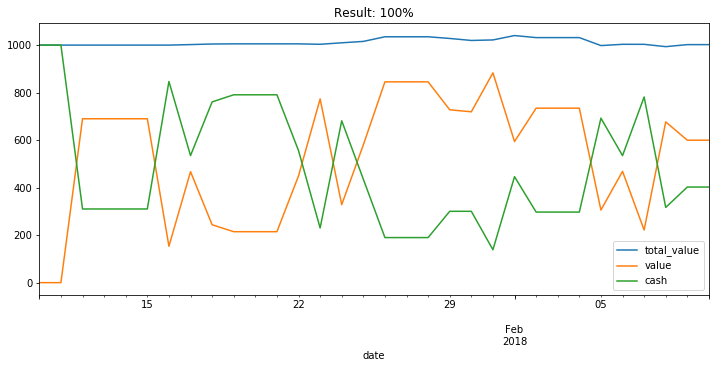

,cash,holdings,date,value,total_value
31,402.4199,"{'mmm': {'low': 218.18, 'open': 224.61, 'symbo...",2018-02-10,599.5820,1002.0019
30,402.4199,"{'mmm': {'low': 218.18, 'open': 224.61, 'symbo...",2018-02-09,599.5820,1002.0019
29,316.7127,"{'mmm': {'low': 222.65, 'open': 233.16, 'symbo...",2018-02-08,676.6991,993.4118
28,781.5407,"{'mmm': {'low': 232.821, 'open': 233.19, 'symb...",2018-02-07,221.6619,1003.2026
27,534.7646,"{'mmm': {'low': 226.81, 'open': 227.51, 'symbo...",2018-02-06,468.5243,1003.2889
26,692.4399,"{'mmm': {'low': 226.01, 'open': 243.5, 'symbol...",2018-02-05,305.5307,997.9706
25,297.0488,"{'mmm': {'low': 244.88, 'open': 246.43, 'symbo...",2018-02-04,734.4677,1031.5165
24,297.0488,"{'mmm': {'low': 244.88, 'open': 246.43, 'symbo...",2018-02-03,734.4677,1031.5165
23,297.0488,"{'mmm': {'low': 244.88, 'open': 246.43, 'symbo...",2018-02-02,734.4677,1031.5165
22,446.1314,"{'mmm': {'low': 246.1646, 'open': 247.44, 'sym...",2018-02-01,594.0061,1040.1375


In [96]:
plot_portfolio("test_portfolio40")

In [11]:
df1 = plot_portfolio("test-ada") # ADAboost - only 1000 samples
df2 = plot_portfolio("test1") # First Random forest
# df3 = plot_portfolio("test2-ada") # ADAboost - Full
# df3 = plot_portfolio("test3-ada") # ADAboost - Full - Sell first, buy later
df3 = plot_portfolio("test4-ada") # ADAboost - Full - Sell first, buy later (All stocks/buy/sell)

twoDf = df1[["date", "total_value"]].merge(df2[["date", "total_value"]], on='date', left_index=True, right_index=True, how='inner')
threeDf = twoDf.merge(df3[["date", "total_value"]], on='date', left_index=True, right_index=True, how='inner')
threeDf.plot(x='date', figsize=(12,5))
plt.show()

KeyboardInterrupt: 

STD	 6.6186553052
Mean	 -0.166327405248
Med	 0.0
Var	 43.8065980491


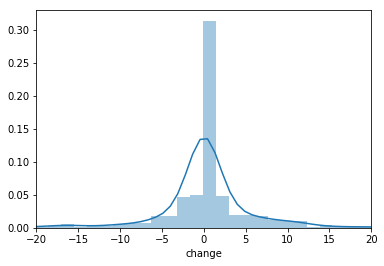

STD	 6.66277243674
Mean	 0.496882293179
Med	 0.0
Var	 44.3925365437


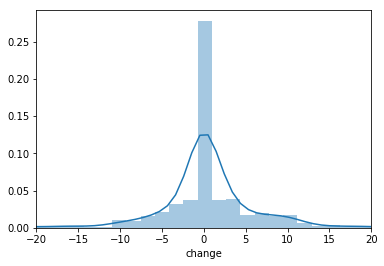

STD	 4.75856471532
Mean	 0.0368975308642
Med	 0.0
Var	 22.6439381499


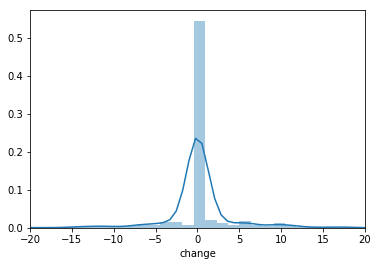

In [7]:
import seaborn as sns

def characteristics(df_sub):
    df_sub["change"] = df_sub.total_value.shift(1) - (df_sub.total_value)

    print("STD\t", df_sub.change.std())
    print("Mean\t", df_sub.change.mean())
    print("Med\t", df_sub.change.median())
    print("Var\t", df_sub.change.var())
    
    sns.distplot(df_sub.change.dropna(), bins=50)
    plt.xlim([-20,20])
    plt.show()
    
characteristics(df1)
characteristics(df2)
characteristics(df3)